In [201]:
# Working on Fifa21 dataset, let us import our library

import pandas as pd
import numpy as np
import seaborn as sb

# import scipy as stats

import matplotlib.pyplot as plt
import missingno as mno
%matplotlib inline

import warnings
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")


In [202]:
# Set print options
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', None)

In [244]:
# We import our dataset and check 10 random data
df_fifa = pd.read_csv('C:/datasets/fifa21 raw data v2.csv')
df_fifa.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


# Data Inspection

In [245]:
# Before we proceed, let us make a copy of our data and work with that. 
df = df_fifa

In [16]:
# Let us check the shape of our data
df.shape

# Notice we have 18979 Rows, 77 Columns

(18979, 77)

In [17]:
#Let us check what our dataset is all about
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   OVA               18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [ ]:
## Issues with our fifia21 dataset

1. Missing values
2. Improper data type
3. Improper data entry[Hits, Club, Contract]
4. Drop columns
5. Rename columns for clarity

<AxesSubplot: >

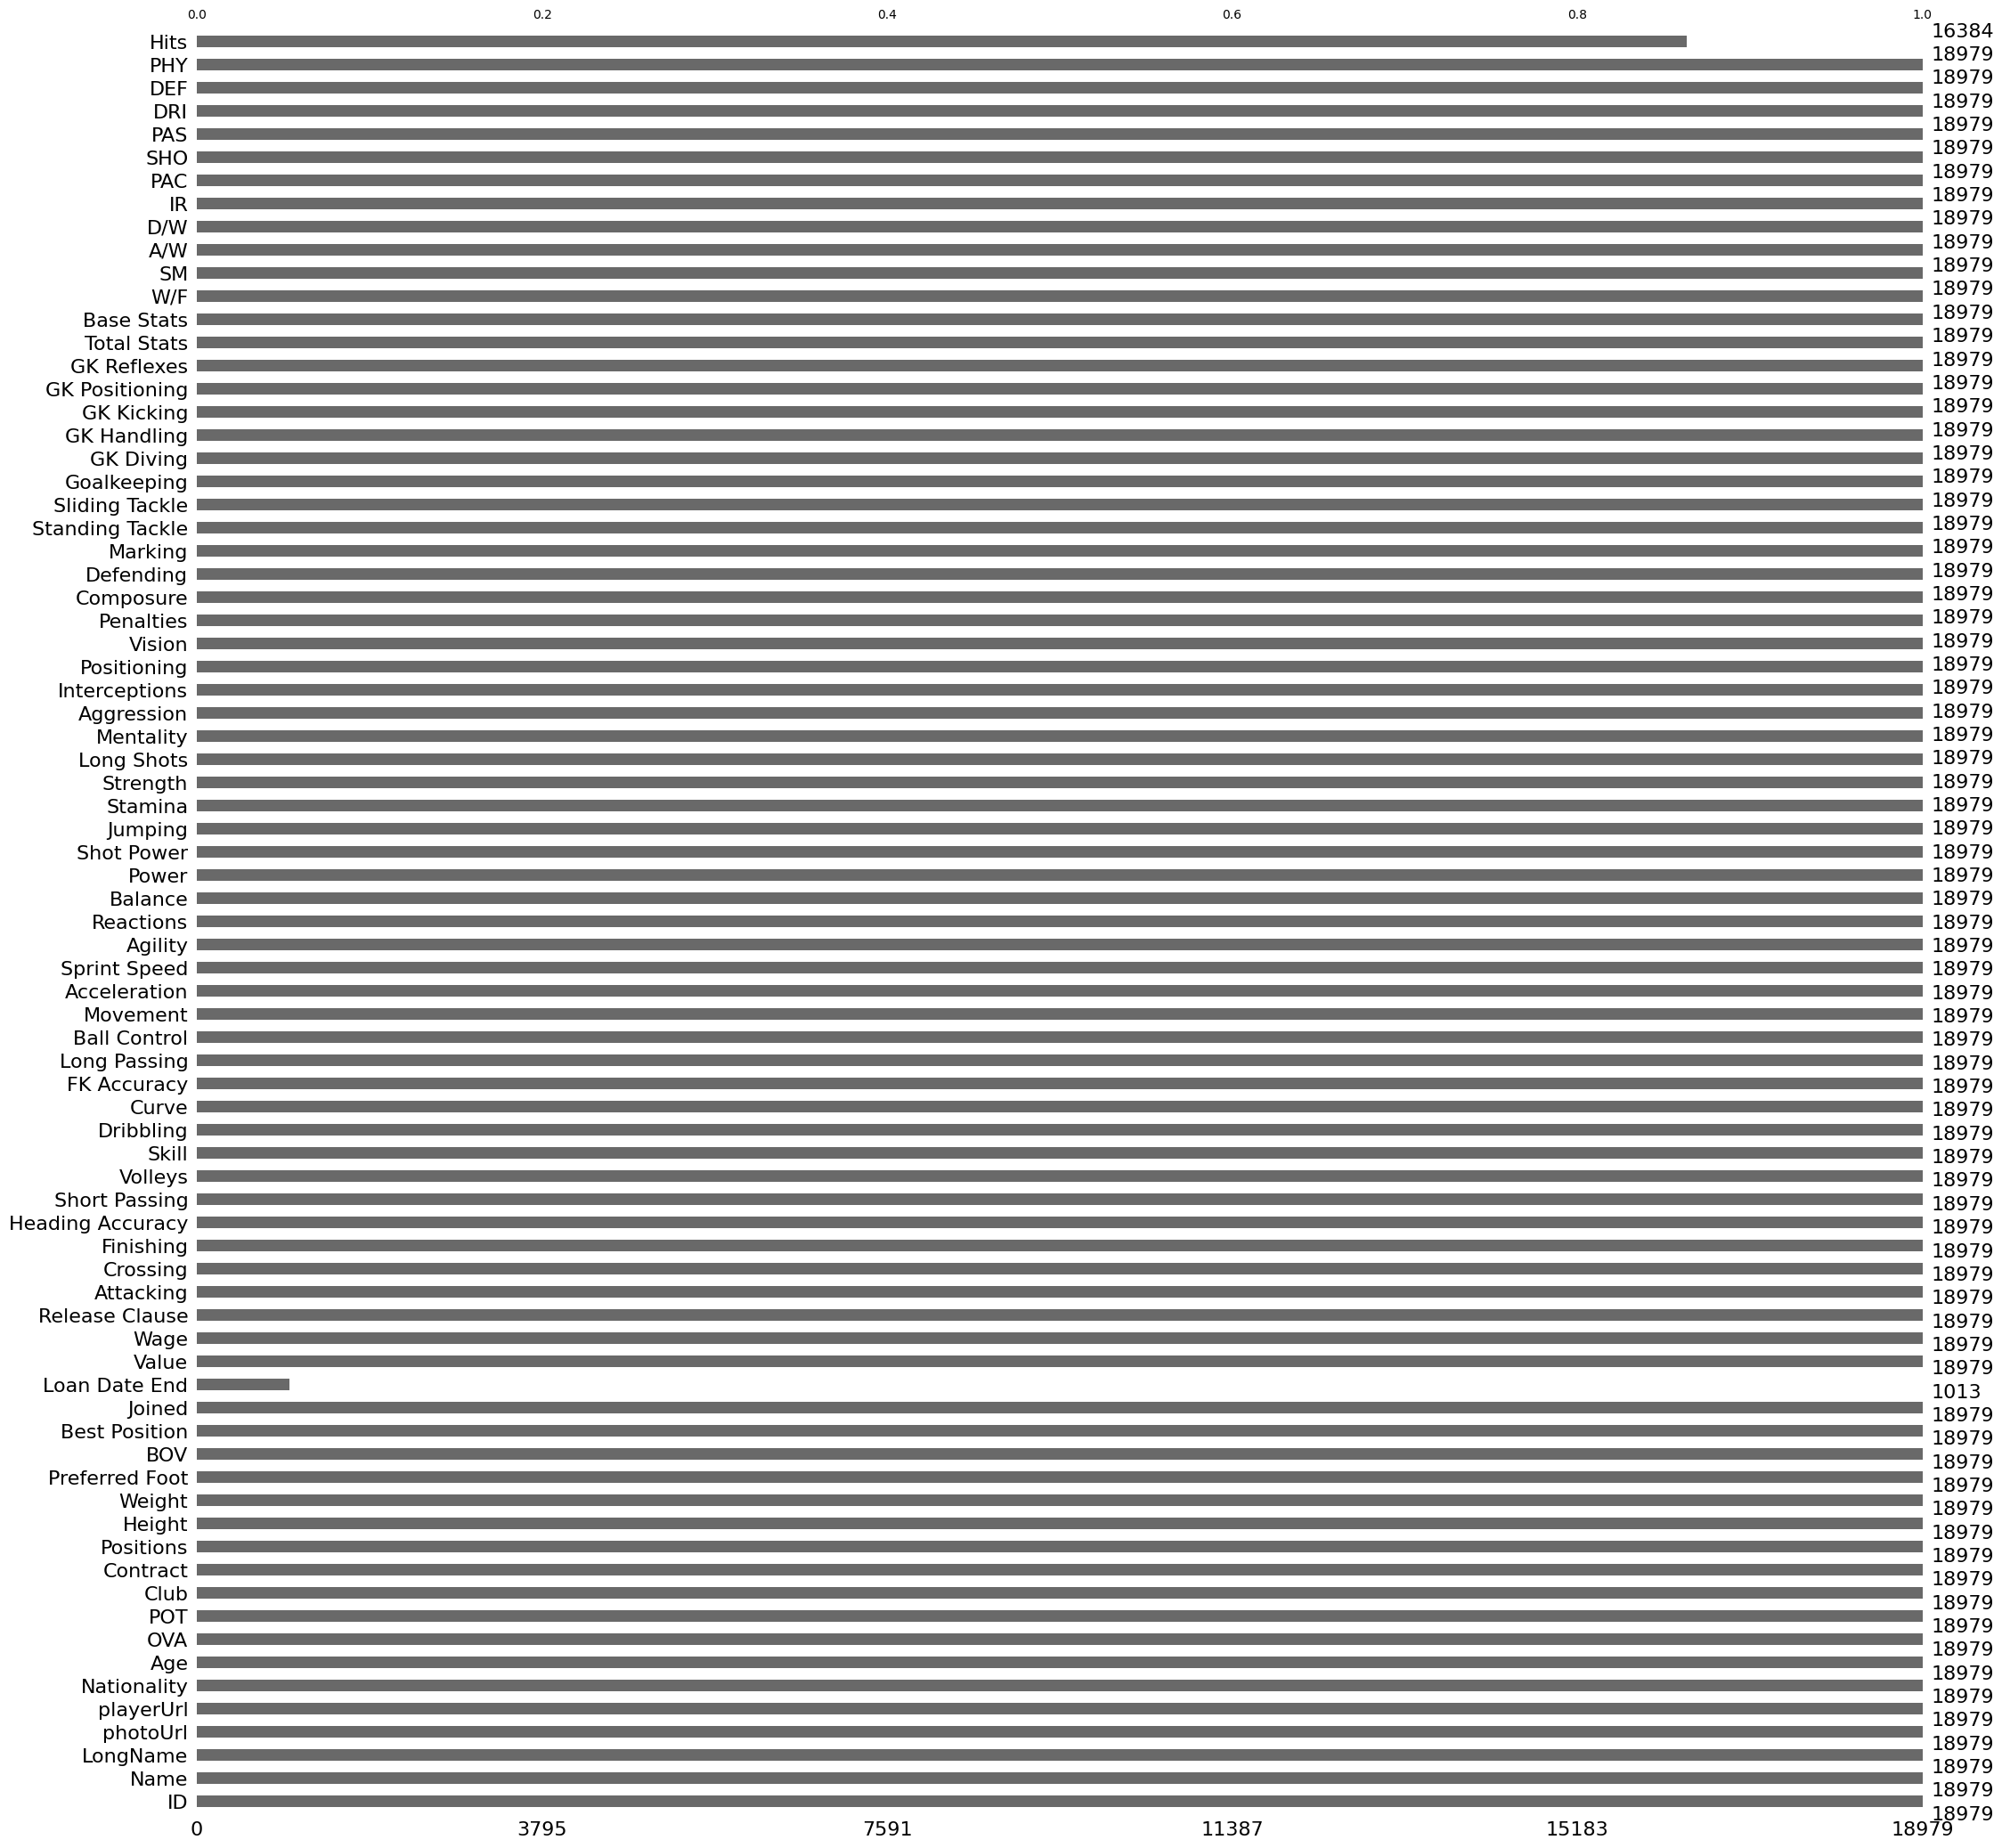

In [18]:
# Check for missing values in our data

mno.bar(df)

In [205]:
#Check the columns with missing values

df[['Loan Date End', 'Hits']].isnull().sum()

Loan Date End    17966
Hits              2595
dtype: int64

In [179]:
# Check for duplicates

df.duplicated().any().sum()

# There are no duplicate values

0

In [246]:
'''From here Notice that 'Loan Date End' column has 17966 nulls which is too much hence, 
we drop the entire column'''

df.drop('Loan Date End', axis=1, inplace=True)


In [181]:
df['Hits'].unique()


array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [247]:
# fill missing values with 0
df['Hits'].fillna(0,inplace=True )

In [248]:
#Let us convert the k values to 100 using a lambda function

df['Hits']=df['Hits'].apply(lambda x: int(float(x[:-1])* 1000) if isinstance(x, str) and 'K' in x else int(x))

In [210]:
df.Hits.unique()

array([ 771,  562,  150,  207,  595,  248,  246,  120, 1600,  130,  321,
        189,  175,   96,  118,  216,  212,  154,  205,  202,  339,  408,
        103,  332,   86,  173,  161,  396, 1100,  433,  242,  206,  177,
       1500,  198,  459,  117,  119,  209,   84,  187,  165,  203,   65,
        336,  126,  313,  124,  145,  538,  182,  101,   45,  377,   99,
        194,  403,  414,  593,  374,  245, 3200,  266,  299,  309,  215,
        265,  211,  112,  337,   70,  159,  688,  116,   63,  144,  123,
         71,  224,  113,  168,   61,   89,  137,  278,   75,  148,  176,
        197,  264,  214,  247,  402,  440, 1700, 2300,  171,  320,  657,
         87,  259,  200,  255,  253,  196,   60,   97,   85,  169,  256,
        132,  239,  166,  121,  109,   32,   46,  122,   48,  527,  199,
        282,   51, 1900,  642,  155,  323,  288,  497,  509,   79,   49,
        270,  511,   80,  128,  115,  156,  204,  143,  140,  152,  220,
        134,  225,   94,   74,  135,  142,   50,   

In [249]:
#Let us replace 0 with median
df['Hits']=df['Hits'].replace(0, df.Hits.median())

In [215]:
# Confirm to see if the Hits column has been changed from object data type to int
df['Hits'].dtype

dtype('int64')

In [216]:
# Let us check the information of our dataset to observe the datatypes, Non_Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   OVA               18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

## Notice the following columns [Value, Wage,Height ,Weight,Joined] has wrong datatype; 'object' which should be a numeric datatype.

In [250]:
df.sample(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
14003,247042,J. Löfgren,Jesper Löfgren,https://cdn.sofifa.com/players/247/042/21_60.png,http://sofifa.com/player/247042/jesper-lofgren...,Sweden,23,61,70,\n\n\n\nMjällby AIF,"Dec 31, 2020 On Loan",CB,193cm,87kg,Right,63,CB,"Jan 1, 2019",€675K,€850,€0,195,25,28,62,57,23,203,51,26,25,45,56,256,55,58,45,56,42,263,33,65,60,82,23,226,57,58,36,39,36,47,174,57,61,56,55,9,12,8,13,13,1372,310,2 ★,2★,Medium,Medium,1 ★,57,29,42,52,59,71,2
15883,251028,K. Poku,Kwame Poku,https://cdn.sofifa.com/players/251/028/21_60.png,http://sofifa.com/player/251028/kwame-poku/210...,England,18,59,75,\n\n\n\nColchester United,2019 ~ 2022,"CAM, RM",175cm,64kg,Left,63,LM,"May 17, 2019",€575K,€950,€772K,233,51,54,33,55,40,249,64,38,39,47,61,371,84,85,76,51,75,274,51,42,78,49,54,233,29,37,58,56,53,56,110,36,41,33,48,7,12,9,6,14,1518,343,4 ★,3★,Medium,Medium,1 ★,85,53,52,64,37,52,17
13588,254952,I. Pitta,Isidro Pitta,https://cdn.sofifa.com/players/254/952/21_60.png,http://sofifa.com/player/254952/isidro-pitta/2...,Paraguay,20,62,72,\n\n\n\nOlimpia Asunción,2020 ~ 2025,ST,183cm,81kg,Right,64,ST,"Jan 1, 2020",€875K,€500,€1.2M,282,36,69,66,50,61,209,57,41,30,21,60,290,62,62,60,52,54,304,62,55,48,77,62,211,44,17,62,43,45,46,59,18,20,21,59,9,11,13,14,12,1414,310,3 ★,2★,High,Medium,1 ★,62,64,40,58,24,62,3


In [251]:
# We have a column Name and Long Name, we don't have need for players long name. Hence, we will drop Long Name,Photourl,Positions.
df.drop(df[['Name','photoUrl','Positions']],axis=1,inplace=True)


In [252]:
df['Club'].unique()

array(['\n\n\n\nFC Barcelona', '\n\n\n\nJuventus',
       '\n\n\n\nAtlético Madrid', '\n\n\n\nManchester City',
       '\n\n\n\nParis Saint-Germain', '\n\n\n\nFC Bayern München',
       '\n\n\n\nLiverpool', '\n\n\n\nReal Madrid', '\n\n\n\nChelsea',
       '\n\n\n\nTottenham Hotspur', '\n\n\n\nInter', '\n\n\n\nNapoli',
       '\n\n\n\nBorussia Dortmund', '\n\n\n\nManchester United',
       '\n\n\n\nArsenal', '\n\n\n\nLazio', '\n\n\n\nLeicester City',
       '\n\n\n\nBorussia Mönchengladbach', '\n\n\n\nReal Sociedad',
       '\n\n\n\nAtalanta', '\n\n\n\nOlympique Lyonnais', '\n\n\n\nMilan',
       '\n\n\n\nVillarreal CF', '\n\n\n\nRB Leipzig', '\n\n\n\nCagliari',
       '\n\n\n\nAjax', '\n\n\n\nSL Benfica', '\n\n\n\nAS Monaco',
       '\n\n\n\nWolverhampton Wanderers', '\n\n\n\nEverton',
       '\n\n\n\nFiorentina', '\n\n\n\nFC Porto', '\n\n\n\nRC Celta',
       '\n\n\n\nTorino', '\n\n\n\nSevilla FC', '\n\n\n\nGrêmio',
       '\n\n\n\nReal Betis', '\n\n\n\nRoma', '\n\n\n\nNewcastle Unite

In [253]:
'''Notice the Club column has some special characters(/n,[0-9.)
    \n\n\n\nFC Barcelona
Let us work on that'''

df['Club']=df['Club'].str.replace('\n', '', regex=True)
#df['Club']=df['Club'].replace(regex=True, to_replace=r'[\n '' ^0-9. \-  ]', value=r'')

In [222]:
# df = df.replace('[^\w\s]', '', regex=True)


In [254]:
df['Club'].str.strip()

0                               FC Barcelona
1                                   Juventus
2                            Atlético Madrid
3                            Manchester City
4                        Paris Saint-Germain
5                          FC Bayern München
6                                  Liverpool
7                                  Liverpool
8                        Paris Saint-Germain
9                               FC Barcelona
10                                 Liverpool
11                                 Liverpool
12                               Real Madrid
13                               Real Madrid
14                         FC Bayern München
15                               Real Madrid
16                               Real Madrid
17                           Manchester City
18                           Manchester City
19                                   Chelsea
20                         FC Bayern München
21                                  Juventus
22        

In [255]:
df.head(2)

,ID,LongName,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,170cm,72kg,Left,93,RW,"Jul 1, 2004",€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,187cm,83kg,Right,92,ST,"Jul 10, 2018",€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562


In [256]:
#check for unique vales 
df['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [257]:
# Wage

T_wage =[]
for x in range(len(df['Wage'])):
    wage= df['Wage'][x]
    wage= value.replace('€','')
    wage= value.replace('K','000')
    wage=value.replace('M','000000')
    wage= value.replace('.','F')
    if 'F' in wage:
        wage= wage.replace('F','')
        wage= int(wage) / 10
    T_wage.append(int(wage))

df['Wage'] = T_wage
df['Wage']
    

0        100000
1        100000
2        100000
3        100000
4        100000
5        100000
6        100000
7        100000
8        100000
9        100000
10       100000
11       100000
12       100000
13       100000
14       100000
15       100000
16       100000
17       100000
18       100000
19       100000
20       100000
21       100000
22       100000
23       100000
24       100000
25       100000
26       100000
27       100000
28       100000
29       100000
30       100000
31       100000
32       100000
33       100000
34       100000
35       100000
36       100000
37       100000
38       100000
39       100000
40       100000
41       100000
42       100000
43       100000
44       100000
45       100000
46       100000
47       100000
48       100000
49       100000
50       100000
51       100000
52       100000
53       100000
54       100000
55       100000
56       100000
57       100000
58       100000
59       100000
60       100000
61       100000
62      

In [228]:
df['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '62', '164cm', '198cm', '63', '65', '511', '64', '61',
       '60', '510', '59', '56', '57', '54', '201cm', '158cm', '162cm',
       '161cm', '160cm', '203cm', '157cm', '156cm', '202cm', '159cm',
       '206cm', '155cm'], dtype=object)

In [258]:
# df['Height'].str.replace('\W', '', regex=True)
''' Notice 166cm', '6\'2"
Heights to inches
'''
T_height =[]
for x in range (len(df['Height'])):
    value = df['Height'][x]
    if pd.isna(value):
        T_height.append(value)
    elif value.endswith('cm'):
        inches= int(float(value[:-2])* 0.393701)
        T_height.append(inches)
    else:
        x =value.replace('"', '').split("'")
        inches= int(x[0])* 12 + int(x[-1])
        T_height.append(inches)
df['Height'] = T_height

In [232]:
df['Height'].unique()

array([  66,   73,   74,   71,   68,   72,   75,   70,   78,   69,   76,
         67,   64,   65,   77,  806,  819,  845, 6643,  832,  793,  780,
       6630,  767,  728,  741,  702,   79,   62,   63,   61,   81],
      dtype=int64)

In [279]:
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [259]:
# Weight in lbs

T_weight= []
for x in range(len(df['Weight'])):
    value = df['Weight'][x]
    if 'lbs' in value:
        value = int(value.replace('lbs', ''))
    elif 'kg' in value:
        value = int(float(value.replace('kg','')) * 2.20462) # This converts kg to lbs
    T_weight.append(value)
    
df['Weight']=T_weight

In [234]:
df['Weight'].unique()

array([158, 182, 191, 154, 149, 176, 156, 200, 160, 187, 202, 152, 185,
       211, 178, 180, 165, 189, 196, 163, 167, 141, 171, 198, 145, 132,
       207, 174, 147, 143, 130, 134, 205, 194, 213, 169, 136, 138, 209,
       220, 127, 183, 179, 172, 170, 203, 168, 161, 146, 190, 148, 159,
       192, 181, 139, 157, 216, 227, 218, 224, 123, 222, 125, 121, 229,
       235, 242, 116, 110, 119, 114], dtype=int64)

In [288]:
# df[['Value', 'Wage','Height' ,'Weight']]= 
#pd.to_numeric
#df[['Value', 'Wage','Height' ,'Weight']].unique()

df['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [260]:
# Value column

T_value =[]
for x in range(len(df['Value'])):
    value= df['Value'][x]
    value= value.replace('€','')
    value= value.replace('K','000')
    value=value.replace('M','000000')
    value= value.replace('.','F')
    if 'F' in value:
        value= value.replace('F','')
        value= int(value) / 10
    T_value.append(int(value))

df['Value'] = T_value
df['Value']
    

0        103500000
1         63000000
2        120000000
3        129000000
4        132000000
5        111000000
6        120500000
7        102000000
8        185500000
9        110000000
10       113000000
11       120500000
12        90500000
13        82000000
14        17500000
15        83500000
16        33500000
17        83500000
18       114500000
19        78000000
20       103000000
21       109000000
22        92000000
23       109000000
24        10000000
25        76500000
26        89500000
27        87500000
28        79500000
29       124000000
30       114000000
31        95000000
32        90500000
33        92500000
34       105500000
35        88500000
36        85000000
37        81500000
38        26000000
39        21000000
40        56000000
41        67500000
42        53000000
43        63000000
44        36500000
45        51000000
46        26000000
47        78000000
48        65500000
49        46500000
50        61500000
51        72500000
52        77

In [236]:
df.sample(4)

,ID,LongName,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
11391,183945,Fredrik Brustad,httpsofifacomplayer183945fredrikbrustad210006,Norway,31,64,64,Mjøndalen IF,2019 2021,74,191,Right,64,ST,Jan 11 2019,500000,100000,500K,290,59,60,61,58,52,258,60,59,32,45,62,353,83,91,66,61,52,341,66,63,76,81,55,247,50,39,60,60,38,61,79,38,29,12,63,13,12,16,7,15,1631,370,2,3,Medium,Medium,1,87,59,55,61,35,73,2
3114,233219,Vukašin Jovanović,httpsofifacomplayer233219vukasinjovanovic210006,Serbia,24,72,75,FC Girondins de Bordeaux,2017 2021,74,189,Right,74,CB,Jul 14 2017,29000000,100000,73M,295,57,47,72,69,50,262,62,33,40,60,67,250,42,36,52,72,48,304,55,74,70,75,30,307,76,74,48,56,53,67,218,72,75,71,45,10,14,6,10,5,1681,353,2,2,High,Medium,1,39,46,59,62,73,74,15
2121,177723,Fabricio Agosto Ramírez,httpsofifacomplayer177723fabricioagostoramirez...,Spain,32,74,74,Fulham,2018 2021,72,176,Right,74,GK,Jul 24 2018,21000000,100000,65M,100,15,14,14,44,13,134,25,19,15,40,35,290,59,54,57,72,48,232,53,72,40,53,14,146,33,26,14,51,22,56,47,22,14,11,364,73,75,71,71,74,1313,420,4,1,Medium,Medium,1,73,75,71,74,56,71,20
4428,189397,Florian Jungwirth,httpsofifacomplayer189397florianjungwirth210006,Germany,31,71,71,San Jose Earthquakes,2017 2020,71,176,Right,71,CB,Feb 2 2017,13000000,100000,26M,263,50,41,65,70,37,294,57,51,54,69,63,293,54,46,57,74,62,306,52,71,76,69,38,305,81,74,55,58,37,67,214,71,70,73,47,10,6,11,7,13,1722,359,4,2,Medium,High,1,50,43,62,60,71,73,3


In [261]:
# Now let us explore the Contract column
df['Contract']=df['Contract'].str.replace("~", "-")


In [282]:
df['Contract']=df['Contract'].str.replace(" ","")

# Notice we have removed the whitespaces from Contract column

In [284]:
df['Contract'].unique()

array(['2004-2021', '2018-2022', '2014-2023', '2015-2023', '2017-2022',
       '2017-2023', '2018-2024', '2014-2022', '2018-2023', '2016-2023',
       '2013-2023', '2011-2023', '2009-2022', '2005-2021', '2011-2021',
       '2015-2022', '2017-2024', '2010-2024', '2012-2021', '2019-2024',
       '2015-2024', '2017-2025', '2020-2025', '2019-2023', '2008-2023',
       '2015-2021', '2020-2022', '2012-2022', '2016-2025', '2013-2022',
       '2011-2022', '2012-2024', '2016-2021', '2012-2023', '2008-2022',
       '2019-2022', '2017-2021', '2013-2024', '2020-2024', '2010-2022',
       '2020-2021', '2011-2024', '2020-2023', '2014-2024', '2013-2026',
       '2016-2022', '2010-2021', '2013-2021', '2019-2025', '2018-2025',
       '2016-2024', '2018-2021', '2009-2024', '2007-2022',
       'Jun30,2021OnLoan', '2009-2021', '2019-2021', '2019-2026', 'Free',
       '2012-2028', '2010-2023', '2014-2021', '2015-2025', '2014-2026',
       '2012-2025', '2017-2020', '2002-2022', '2020-2027', '2013-2025',
   

In [293]:
# Create a Contract Type feture based on Certain Conditions of Contract Column.
df['Contract Type']= df['Contract'].apply(lambda x: 'Free' if x=='Free'
                                         else 'On Loan' if 'OnLoan' in x
                                         else 'Permanent' if '-' in x
                                         else np.nan)


In [294]:
df['Contract Type'].unique()

# Notice we have created a ned column Contract Type

array(['Permanent', 'On Loan', 'Free'], dtype=object)

In [297]:
df[['Contract Start','Contract End']]= df['Contract'].str.strip('[]').str.split('-', expand=True)

In [302]:
df[['LongName','Contract Type','Contract Start','Contract End','Contract']].sample(3)

,LongName,Contract Type,Contract Start,Contract End,Contract
7240,Geoffry Hairemans,Permanent,2019,2022,2019-2022
12987,Scott Flinders,Permanent,2017,2021,2017-2021
5042,Douglas Arthur Silbeira Martins,Permanent,2019,2023,2019-2023


In [295]:
# Now convert the date joined to Datetime datatype
df['Joined']=pd.to_datetime(df['Joined'])
df['Joined']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
5       2014-07-01
6       2017-07-01
7       2018-07-19
8       2018-07-01
9       2014-07-01
10      2018-01-01
11      2016-07-01
12      2013-07-11
13      2018-08-09
14      2011-07-01
15      2009-07-09
16      2005-08-01
17      2011-07-28
18      2015-07-14
19      2016-07-16
20      2015-07-01
21      2015-07-01
22      2017-07-01
23      2010-07-01
24      2012-07-01
25      2014-07-01
26      2019-07-01
27      2014-07-17
28      2019-07-12
29      2017-08-31
30      2015-10-07
31      2017-07-01
32      2017-07-21
33      2018-01-30
34      2020-01-30
35      2018-07-01
36      2015-08-28
37      2015-07-06
38      2019-09-02
39      2005-07-01
40      2008-09-01
41      2018-01-31
42      2017-07-19
43      2015-08-06
44      2012-08-01
45      2020-09-25
46      2012-08-31
47      2016-07-27
48      2008-08-10
49      2011-07-01
50      2013-07-05
51      2011-07-01
52      2012

In [303]:
df.head(3)

,ID,LongName,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Type,Contract Start,Contract End
0,158023,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004-2021,66,158,Left,93,RW,2004-07-01,103500000,100000,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,Permanent,2004,2021
1,20801,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018-2022,73,182,Right,92,ST,2018-07-10,63000000,100000,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,Permanent,2018,2022
2,200389,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014-2023,74,191,Right,91,GK,2014-07-16,120000000,100000,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,Permanent,2014,2023


## The data cleaning step is iterative and we need to be double sure before concluding that our dataset is clean and free of dirts.

## Notice ['Positions','Best Positions','Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats'] Columns are the same hence, we will only keep Best Positions, Goalkeeping,Total Stats column


In [304]:
df=df.drop(df[['GK Diving', 'GK Handling',
              'GK Kicking', 'GK Positioning', 'GK Reflexes','Base Stats']], axis=1)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 70 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                18979 non-null  int64         
 1   LongName          18979 non-null  object        
 2   playerUrl         18979 non-null  object        
 3   Nationality       18979 non-null  object        
 4   Age               18979 non-null  int64         
 5   OVA               18979 non-null  int64         
 6   POT               18979 non-null  int64         
 7   Club              18979 non-null  object        
 8   Contract          18979 non-null  object        
 9   Height            18979 non-null  int64         
 10  Weight            18979 non-null  int64         
 11  Preferred Foot    18979 non-null  object        
 12  BOV               18979 non-null  int64         
 13  Best Position     18979 non-null  object        
 14  Joined            1897

In [ ]:
#Rename the following columns for clarity
OVA - Overall Analysis
POT - Potentials Rating
BOV - Best Overall Rating
W/F - Weak Foot
SM - Skill Moves 
A/W - Attacking Workrate
D/W - Defensive Workrate
IR - Injury Rating
PAC - Pace
SHO - Shooting Attribute
PAS - Pass Accuracy
DRI - Dribbling Ability
DEF - Defensive Ability
PHY - Strenght
Hits - Profile Views

In [307]:
# Now let us rename the identified features

df.rename(
    columns={'LongName':'FullName','W/F': 'Weak Foot', 'SM': 'Skill Moves', 'A/W': 'Attacking Workrate', 
             'D/W':'Defensive Workrate' , 'IR':'Injury Rating', 'PAC':'Pace', 'SHO':'Shooting Attribute', 
             'PAS': 'Pass Accuracy','DRI':'Dribbling Ability', 'DEF':'Defensive Ability', 'PHY':'Strenght',
            'OVA': 'Overall Rating','POT':'Potential Rating',
'BOV' :'Best Overall Rating' ,'Hits':'Profile Views'},
    inplace = True
)

In [308]:
# We have to perform some cleaning on columns with star rating(★)
df[['Weak Foot', 'Skill Moves','Injury Rating']].sample(3)

,Weak Foot,Skill Moves,Injury Rating
9707,3 ★,4★,1 ★
5188,4 ★,3★,1 ★
15283,3 ★,2★,1 ★


In [309]:
# Removing the star rating (★)

df =df.replace('★','', regex=True)
print('★ Rating has been removed successfully')

★ Rating has been removed successfully


In [130]:
df[['Weak Foot', 'Skill Moves','Injury Rating']].sample(3)

,Weak Foot,Skill Moves,Injury Rating
16029,3,2,1
3153,2,2,1
4437,3,1,1


In [310]:
# We need to change the data type of the following columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   18979 non-null  int64         
 1   FullName             18979 non-null  object        
 2   playerUrl            18979 non-null  object        
 3   Nationality          18979 non-null  object        
 4   Age                  18979 non-null  int64         
 5   Overall Rating       18979 non-null  int64         
 6   Potential Rating     18979 non-null  int64         
 7   Club                 18979 non-null  object        
 8   Contract             18979 non-null  object        
 9   Height               18979 non-null  int64         
 10  Weight               18979 non-null  int64         
 11  Preferred Foot       18979 non-null  object        
 12  Best Overall Rating  18979 non-null  int64         
 13  Best Position        18979 non-

In [311]:
df['ID']=df.ID.astype(str)
df['ID'].dtypes

dtype('O')

In [300]:
# df[['Contract End','Contract Type', 'Contract Start']].sample(16)
df['Contract Type'].unique()

array(['Permanent', 'On Loan', 'Free'], dtype=object)

In [317]:
#drop Release clause

df= df.drop('Release Clause', axis=1)

In [323]:
df.head()

,ID,FullName,playerUrl,Nationality,Age,Overall Rating,Potential Rating,Club,Contract,Height,Weight,Preferred Foot,Best Overall Rating,Best Position,Joined,Value,Wage,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,Total Stats,Weak Foot,Skill Moves,Attacking Workrate,Defensive Workrate,Injury Rating,Pace,Shooting Attribute,Pass Accuracy,Dribbling Ability,Defensive Ability,Strenght,Profile Views,Contract Type,Contract Start,Contract End
0,158023,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004-2021,66,158,Left,93,RW,2004-07-01,103500000,100000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,2231,4,4,Medium,Low,5,85,92,91,95,38,65,771,Permanent,2004,2021
1,20801,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018-2022,73,182,Right,92,ST,2018-07-10,63000000,100000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,2221,4,5,High,Low,5,89,93,81,89,35,77,562,Permanent,2018,2022
2,200389,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014-2023,74,191,Right,91,GK,2014-07-16,120000000,100000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,1413,3,1,Medium,Medium,3,87,92,78,90,52,90,150,Permanent,2014,2023
3,192985,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015-2023,71,154,Right,91,CAM,2015-08-30,129000000,100000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,2304,5,4,High,High,4,76,86,93,88,64,78,207,Permanent,2015,2023
4,190871,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017-2022,68,149,Right,91,LW,2017-08-03,132000000,100000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,2175,5,5,High,Medium,5,91,85,86,94,36,59,595,Permanent,2017,2022


In [318]:
#Our clean data
df.shape

(18979, 69)

In [319]:
# Our Original data
dffifa.shape

(18979, 77)

In [320]:
''' We are through with the data cleaning. 

 We need to save it in a csv format.'''

df.to_csv('Fifa 2021.csv', index=False)